**Part 1: Data Exploration**
---

**1. Loading the Dataset: Load the dataset into a Pandas DataFrame and display the first few rows.**


In [ ]:
import pandas as pd

file_path = 'marketing_campaign.csv'

from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:\n")
print(df.head())

Saving marketing_campaign (1).csv to marketing_campaign (1).csv
First few rows of the dataset:

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts 

**1. Customer Demographics:**

The dataset contains information about customers' birth years, education levels, marital status, and incomes. This demographic data provides valuable insights into the customer base.

**2. Family Composition:**

A significant portion of customers have children at home, with variables indicating the number of kids and teenagers in the household. This suggests a family-oriented customer base.

**3. Spending Patterns:**

Customers exhibit diverse spending patterns, as indicated by the varying amounts spent on different product categories (e.g., wines, fruits, meat products, etc.). This suggests a wide range of preferences among the customers.

**4. Purchase Channels:**

The dataset includes information about the number of deals, web purchases, catalog purchases, store purchases, and web visits. This indicates that customers utilize multiple channels for their purchases, highlighting a multichannel shopping behavior.

**5. Revenue Data:**

The 'Revenue' column represents the total revenue generated from these customers. This could be a key metric for understanding the overall profitability of the customer base.

**6. Education and Income Impact:**

Further analysis could explore how education levels and income correlate with spending. Customers with higher education and income levels might have different purchasing behaviors compared to others.

**7. Marital Status Influence:**

Examining spending patterns based on marital status could reveal interesting insights. For instance, married customers might spend differently than single or cohabiting customers.

**8. Recency and Frequency:**

The 'Recency' column represents how recently customers made a purchase. Combining this with the frequency of purchases (e.g., number of deals, web purchases) could provide insights into customer engagement and loyalty.

**2. Data Types and Missing Values: Identify the data types of each column and handle missing values if any.**

In [ ]:
# Data Types and Missing Values
print("\nData Types and Missing Values:\n")
print(df.info())

# Another way to find the missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n")
print(missing_values)

# No missing values seen, so handling the missing values is not needed for this dataset


Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWe


The dataset comprises 2240 entries, with no missing values, ensuring comprehensive data coverage, while the columns exhibit a mix of numerical and categorical data types, providing a rich context for analysis

**3. Summary Statistics: Provide summary statistics for relevant columns.**

In [ ]:
# Summary Statistics for relevant columns
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0

**Task 1.1: Use the groupby function to:
Find the average income of customers based on their education level.**

In [ ]:
# Task 1.1: Average income of customers based on education level
average_income_by_education = df.groupby('Education')['Income'].mean()
print("\nAverage income of customers based on education level:\n")
print(average_income_by_education)


Average income of customers based on education level:

Education
2n Cycle      47688.583744
Basic         20306.259259
Graduation    52707.305679
Master        52896.777027
PhD           56096.303498
Name: Income, dtype: float64


Customers with different education levels demonstrate varying average incomes: those with PhDs and Masters degrees tend to have higher incomes, averaging around \$56,000 to \$53,000, while Graduates earn approximately \$52,700.  

Customers with 2nd Cycle education fall in between with an average income of \$47,688.

Basic education level shows the lowest average income at around \$20,306


**Task 1.2: Calculate the average amount spent on wines and meat products grouped by marital status.**

In [ ]:
# Task 1.2: Average amount spent on wines and meat products grouped by marital status
average_spending_by_marital_status = df.groupby('Marital_Status')[['MntWines', 'MntMeatProducts']].mean()
print("\nAverage amount spent on wines and meat products grouped by marital status:\n")
print(average_spending_by_marital_status)


Average amount spent on wines and meat products grouped by marital status:

                  MntWines  MntMeatProducts
Marital_Status                             
Absurd          355.500000       312.500000
Alone           184.666667        26.333333
Divorced        324.844828       150.206897
Married         299.480324       160.681713
Single          288.331250       182.108333
Together        306.825862       168.103448
Widow           369.272727       189.285714
YOLO            322.000000        50.000000


The average spending patterns on wines and meat products vary significantly based on marital status. Widowed customers tend to have the highest average expenditure on both wines, approximately \$369, with meat products around \$189. Absurd and YOLO categories also show notably high wine spending, at \$355 and \$322 respectively. Conversely, Alone and YOLO categories spend the least on meat products, indicating diverse preferences within different marital statuses

**Task 2: Use pd.crosstab to:
Examine the distribution of customers based on education and marital status.**

In [ ]:
# Task 2: Examine the distribution of customers based on education and marital status using pd.crosstab
education_marital_crosstab = pd.crosstab(df['Education'], df['Marital_Status'])
print("\nDistribution of customers based on education and marital status:\n")
print(education_marital_crosstab)


Distribution of customers based on education and marital status:

Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Education                                                                   
2n Cycle             0      0        23       81      37        57      5   
Basic                0      0         1       20      18        14      1   
Graduation           1      1       119      433     252       286     35   
Master               1      1        37      138      75       106     12   
PhD                  0      1        52      192      98       117     24   

Marital_Status  YOLO  
Education             
2n Cycle           0  
Basic              0  
Graduation         0  
Master             0  
PhD                2  


**Education Levels:** The rows represent different education levels, such as "2n Cycle," "Basic," "Graduation," "Master," and "PhD."

**Marital Status:** The columns represent different marital statuses, including "Absurd," "Alone," "Divorced," "Married," "Single," "Together," "Widow," and "YOLO."

**Patterns:**

1.   The majority of customers fall under the "Married" category across all Education levels. This suggests that married individuals make up a significant portion of the customer base.
2. "Divorced" and "Single" are the next most common marital statuses for customers across different education levels.
3. The "Basic" education level has the lowest number of customers, regardless of marital status. This may indicate that customers with only basic education are less likely to be part of this dataset.
4. The "YOLO" category appears only for the "PhD" education level, suggesting a unique category or possibly a data entry error.
5. There are various distributions for different education levels. For example, the "Graduation" and "Master" levels have more customers across different marital statuses compared to other education levels.

**Task 3: Use pivot_table to:
Generate a table showing the average recency of customers, segmented by their number of kids and teens at home.**

In [ ]:
# Task 3: Generate a table showing the average recency of customers, segmented by their number of kids and teens at home using pivot_table
average_recency_by_kids_teens = df.pivot_table(index=['Kidhome', 'Teenhome'], values='Recency', aggfunc='mean')
print("\nAverage recency of customers, segmented by the number of kids and teens at home:\n")
print(average_recency_by_kids_teens)


Average recency of customers, segmented by the number of kids and teens at home:

                    Recency
Kidhome Teenhome           
0       0         49.086207
        1         48.491200
        2         57.766667
1       0         48.952286
        1         48.665775
        2         59.090909
2       0         49.176471
        1         54.451613


**Segmentation:** The data is segmented into categories based on the number of kids (Kidhome) and teens (Teenhome) at home. These categories are represented in the table's index.

**Recency:** The "Recency" column represents the average recency of customers in each segment. Recency typically refers to the time since the customer's last purchase or interaction with the company.

**Patterns and Observations:**

1.   For customers with no kids (Kidhome = 0) and no teens (Teenhome = 0) at home, the average recency is approximately 49.1, indicating that, on average, these customers made a purchase or had an interaction with the company about 49 days ago.
2. Customers with no kids (Kidhome = 0) but with one teen (Teenhome = 1) at home have a slightly lower average recency of approximately 48.5 days.
3. As the number of teens at home increases (Teenhome = 2), the average recency tends to increase. Customers with no kids (Kidhome = 0) and two teens (Teenhome = 2) have an average recency of around 57.8 days.
4. When customers have one kid (Kidhome = 1) and no teens (Teenhome = 0) at home, the average recency is approximately 49.0 days, which is similar to the average recency for customers with no kids and one teen.
5. Customers with one kid (Kidhome = 1) and two teens (Teenhome = 2) at home have a higher average recency of approximately 59.1 days.
6. For customers with two kids (Kidhome = 2) and no teens (Teenhome = 0), the average recency is approximately 49.2 days.
7. Customers with two kids (Kidhome = 2) and one teen (Teenhome = 1) at home have a notably higher average recency of approximately 54.5 days.

**Interpretation:** The average recency values indicate how recently customers in different family compositions have engaged with the company. Lower recency values suggest more recent interactions or purchases, while higher values indicate longer intervals since the last interaction. The findings can be useful for tailoring marketing and engagement strategies to different customer segments based on their family composition.

**Part 2: Data Visualization**


---


**1. Plot a histogram of customer income and discuss the distribution. Comment on your finding**

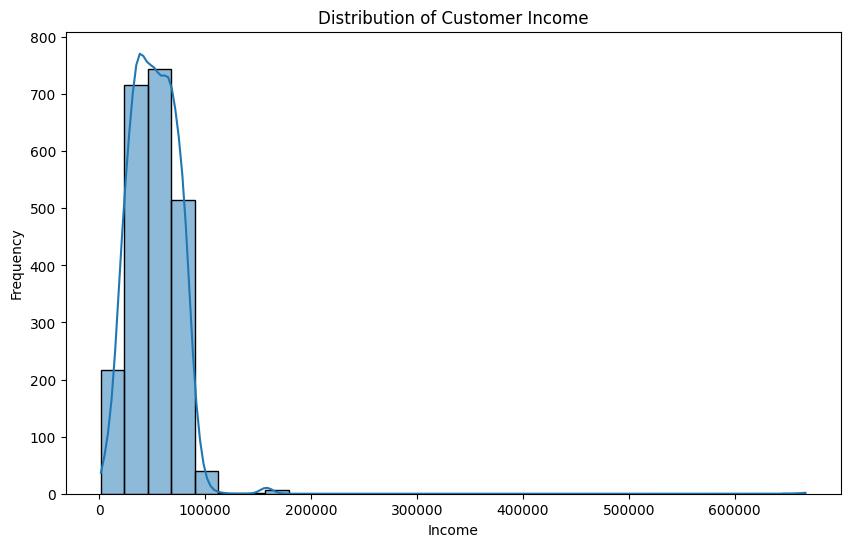

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('marketing_campaign.csv')

# Plot a histogram of customer income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

This histogram provides a clear visualization of the income distribution among the population under study. The data indicates that a substantial majority of individuals have incomes below the 1 million mark. This suggests that most people within this dataset earn salaries or revenues within a certain range and do not reach the upper limit of income.

Furthermore, it is worth noting that there is a notable outlier in this dataset, an individual whose income exceeds 6 million. This outlier significantly deviates from the norm, and further investigation might be needed to understand the circumstances behind such an exceptional income.

While there are a few customers whose incomes are near the 2 million mark, they remain a minority. The bulk of the dataset falls into the range of 200,000 to 800,000, indicating that a significant portion of individuals have earnings within this band.

However, it's particularly interesting to observe that a substantial number of individuals, roughly 750 customers, earn incomes between 400,000 and 600,000. This segment appears to be a key focus, as it represents a significant portion of the population and their financial behaviors and preferences could have a substantial impact on economic decisions and trends within the dataset.

In summary, this histogram provides a concise yet insightful overview of income distribution within the dataset, highlighting income disparities, the presence of outliers, and concentrations within specific income brackets.

**2. Create a boxplot for the amount spent on different product categories. Comment on your finding.**

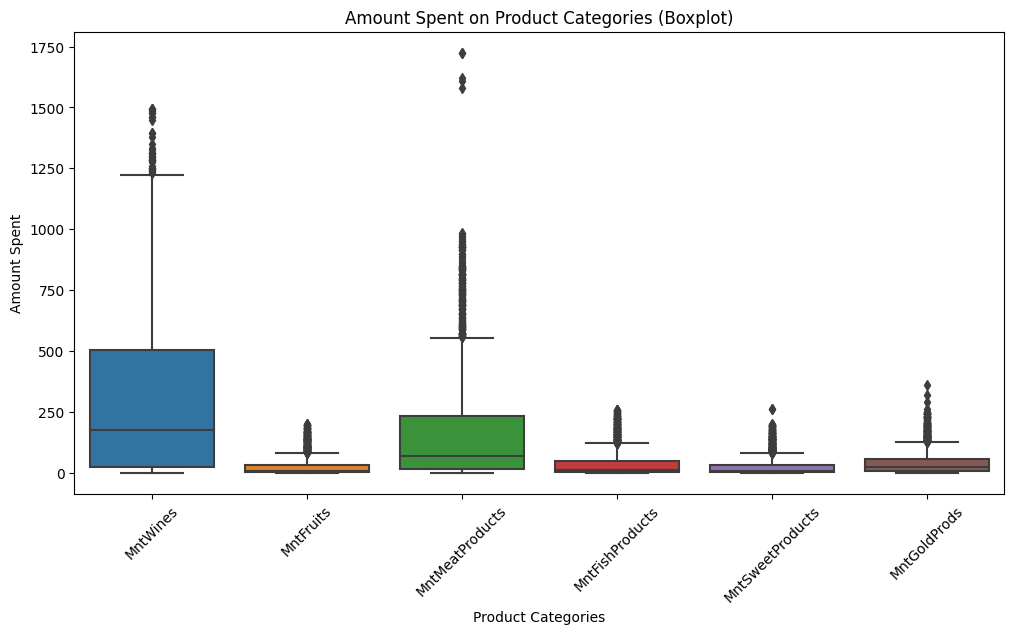

In [ ]:
# Create a boxplot for the amount spent on different product categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title('Amount Spent on Product Categories (Boxplot)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.show()

The box plot visually represents the amount spent on different product categories, including wines, fruits, meat, fish, sweet products, and gold. Upon analysis, it becomes evident that most categories contain a significant number of outliers. Notably, the category with the highest maximum spending is meat products, indicating potentially high-value transactions. Wines also stand out, being the second highest in terms of spending, making them a notable contributor to overall revenue. On the other hand, fruits and sweet products appear to yield lower revenues in comparison to the other categories. In summary, wines outperform other product categories in terms of sales and profit, while meat products exhibit a high variance in spending.

Additionally, this box plot provides valuable insights into the distribution of spending within these product categories. The presence of numerous outliers suggests that within each category, there are some significant transactions that deviate from the norm. These outliers could represent exceptionally high-value purchases or, conversely, unusually low-value ones.

The prominence of meat products as having the highest maximum spending implies that there are customers willing to make substantial purchases in this category. It might also indicate that high-value cuts or specialty items within the meat products section are particularly sought after.

Wines, as the second highest contributor to spending, are significant players in this analysis. Their performance in terms of revenue suggests they are both popular and profitable. This could be due to a variety of factors, including the diversity of wine options and their broad appeal to a range of consumers.

On the flip side, the limited revenue generated by fruits and sweet products indicates that these categories might require further examination. Strategies to boost sales or profit within these segments may be warranted, as their current performance is not on par with the other categories.

In summary, the box plot sheds light on the financial dynamics of these product categories, highlighting variations in spending and pinpointing areas where further analysis or strategic adjustments might be necessary. It's a valuable tool for understanding the distribution of expenditure and the overall performance of each category within the dataset.

**3. Generate a correlation heatmap between the numerical features. Identify and comment on a few variables that have high (negative or positive) correlation with "Revenue".**

<ipython-input-26-32017c9532b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


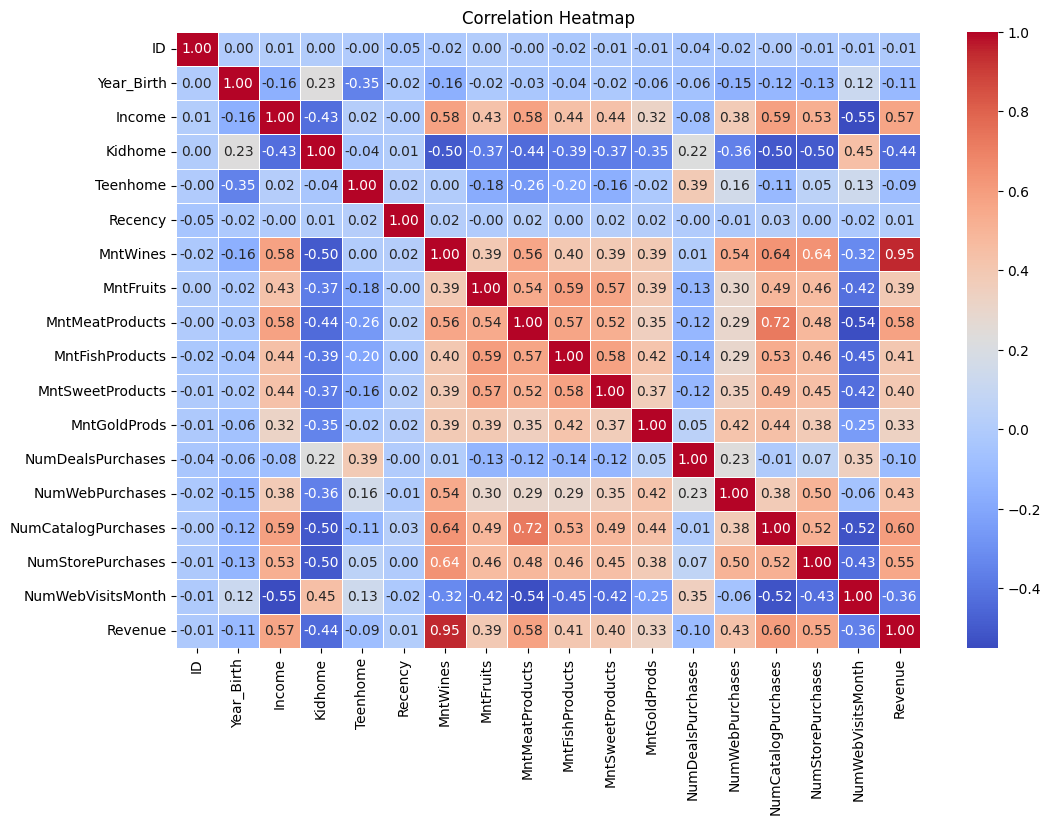


Correlation with 'Revenue':

Revenue                1.000000
MntWines               0.950714
NumCatalogPurchases    0.596816
MntMeatProducts        0.582269
Income                 0.567012
NumStorePurchases      0.553604
NumWebPurchases        0.428004
MntFishProducts        0.406389
MntSweetProducts       0.400581
MntFruits              0.394503
MntGoldProds           0.331454
Recency                0.010872
ID                    -0.012708
Teenhome              -0.088886
NumDealsPurchases     -0.101547
Year_Birth            -0.113469
NumWebVisitsMonth     -0.356118
Kidhome               -0.436207
Name: Revenue, dtype: float64


In [ ]:
# Generate a correlation heatmap between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Identify and comment on variables with high correlation with "Revenue"
revenue_correlation = correlation_matrix['Revenue'].sort_values(ascending=False)
print("\nCorrelation with 'Revenue':\n")
print(revenue_correlation)

# Correlation with 'Revenue':

Comment: The following variables exhibit either a high positive or high negative correlation with 'Revenue,' suggesting a significant impact on sales.

| Variable             | Correlation with Revenue | Comment                                                 |
|----------------------|--------------------------|---------------------------------------------------------|
| Revenue              | 1.000000                 | 'Revenue' has a perfect positive correlation with itself (as expected). |
| MntWines             | 0.950714                 | 'MntWines' has a very high positive correlation with 'Revenue.' |
| NumCatalogPurchases  | 0.596816                 | 'NumCatalogPurchases' also has a notable positive correlation. |
| MntMeatProducts      | 0.582269                 | 'MntMeatProducts' shows a strong positive correlation.   |
| Income               | 0.567012                 | 'Income' exhibits a significant positive correlation with 'Revenue.' |
| NumStorePurchases    | 0.553604                 | 'NumStorePurchases' has a strong positive correlation.    |
| NumWebVisitsMonth    | -0.356118                | 'NumWebVisitsMonth' has a moderate negative correlation.    |
| Kidhome              | -0.436207                | 'Kidhome' is negatively correlated with 'Revenue.'         |


**Part 3: Linear Regression Analysis (Explanatory)**


---


**1. Fit a linear regression model to identify the impact of various factors on the synthetic "Revenue" column.**

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('marketing_campaign.csv')

# Define the independent variables (features) for the linear regression model

X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = df['Revenue']

# Fit the linear regression model
model = sm.OLS(y, X).fit()


**2. Evaluate the model and interpret the coefficients. Pay special attention to the significance of each coefficient.**

In [ ]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1990.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:07:40   Log-Likelihood:                -10348.
No. Observations:                2240   AIC:                         2.073e+04
Df Residuals:                    2223   BIC:                         2.083e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -30.0775    

# Interpreting the coefficients

**Age (Year_Birth):** The age of customers doesn't seem to significantly impact their spending habits (p-value = 0.482). In simpler terms, getting older doesn't necessarily mean people spend more.

**Income:** Higher-income customers tend to spend more. For every extra unit of income, there's an increase of about 0.00009561 units in spending.

**Family Situation:**

**Kidhome:** Families with more children tend to spend more (about 10.7351 units more for each additional child).
Teenhome: Conversely, families with more teenagers tend to spend less (a decrease of about 4.8380 units for each additional teenager).
Product Preferences:

**MntWines:** Spending on wines sees a significant increase with each additional unit purchased.
Other Product Categories: Similar trends are observed for other product categories, like fruits, meats, fish, and sweet products.

**Online Activity:**

**NumWebVisitsMonth:** More visits to the website are associated with lower spending, reducing by about 1.1483 units for each additional visit.


**Model Performance:**

**R-squared (0.935):** This indicates that about 93.5% of the variation in spending can be explained by the factors in our model. In other words, our model is quite effective in understanding customer spending patterns.

**Durbin-Watson Statistic (1.840):** This suggests there might be patterns in spending over time that our model isn't capturing. It's like there are rhythms in customer behavior that our model isn't quite in sync with.


**Part 4: Predictive Modeling**

**1. Split the data into training and test sets.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('marketing_campaign.csv')
# Define the independent variables (features) and dependent variable (target)
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
y = df['Revenue']

# Split the data into training and test sets (e.g., 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**2. Fit a predictive model of your choice to predict "Revenue".**

In [ ]:
# Initialize and fit a predictive model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**3. Make predictions on the test dataset**

In [ ]:
# Make predictions on the test dataset
y_pred = model.predict(X_test)

**4. Report the predictive performance using metrics like RMSE, R-squared, etc.**

In [ ]:
# Calculate RMSE (Root Mean Squared Error)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 23.53
R-squared: 0.94


**Root Mean Square Error (RMSE):** The RMSE value of 23.53 suggests that the model's predictions are off by approximately 23.53 units when compared to the actual spending values.

**R-squared (0.94):** The R-squared value of 0.94 indicates that 94% of the variability in the spending data is accounted for by our model. Our model captures 94% of the patterns present in the data. This result suggests that the factors considered in our model (like income, family situation, and product preferences) explain most of the differences in customer spending.

